In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Технологии анализа данных и машинного обучения/04 – классификация

/content/drive/MyDrive/Colab Notebooks/Технологии анализа данных и машинного обучения/04 – классификация


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn import metrics

In [ ]:
from sklearn.model_selection import learning_curve, ShuffleSplit, GridSearchCV

In [ ]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, classification_report

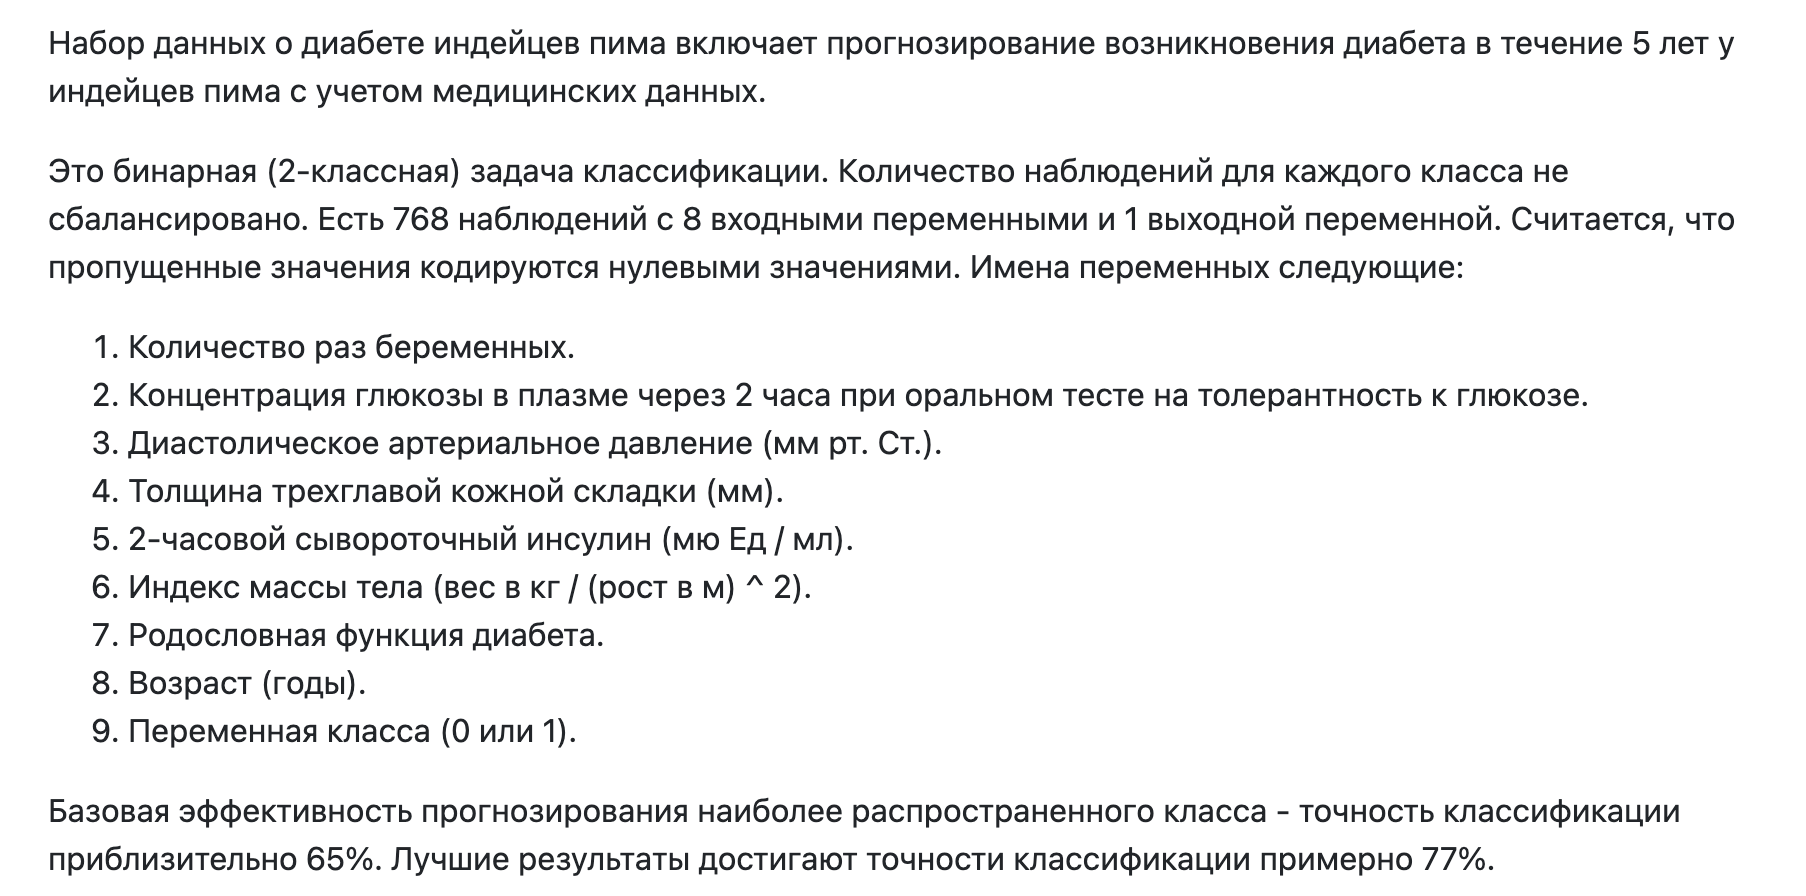

## Задания для выполнения

* Загрузите данные о диагностике сахарного диабета;
* Разделите эти данные на тестовую и обучающую выборки;
* Постройте модель классификации для определения заболевания;
* Оцените качество модели на тестовой выборке с помощью следующих метрик:
* * достоверность предсказания (accuracy);
* * точность (precision);
* * полнота (recall);
* Сделайте вывод о применимости модели.


In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 
             'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('diabetes.csv', header=None, names=col_names)
pima = pima[1:]

In [ ]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pima.shape

(768, 9)

При проведении серьезного анализа перед построением модели машинного обучения нужно провести тщательную обработку и очистку набора данных - удаление пропущенных значений, анализ шкал, нормализация, удаление выбросов и аномалий. Используемый нами набор - сам по себе довольно чистый, потому в учебных целях пропустим этот шаг.


In [ ]:
Y = pima.label.astype('int64')
X = pima.drop(['label'], axis=1)

In [ ]:
X.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
count,768,768,768,768,768,768,768,768
unique,17,136,47,51,186,248,517,52
top,1,99,70,0,0,32,0.258,22
freq,135,17,57,227,374,13,6,72


In [ ]:
np.unique(Y, return_counts=True)

(array([0, 1]), array([500, 268]))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=True)

In [ ]:
cls_ligit = LogisticRegression(max_iter=500)

In [ ]:
cls_ligit.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [ ]:
y_pred = cls_ligit.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
metrics.confusion_matrix(y_test, y_pred)

array([[89, 10],
       [24, 31]])

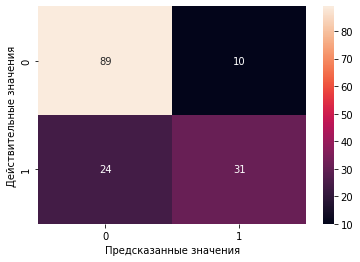

In [ ]:
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения');

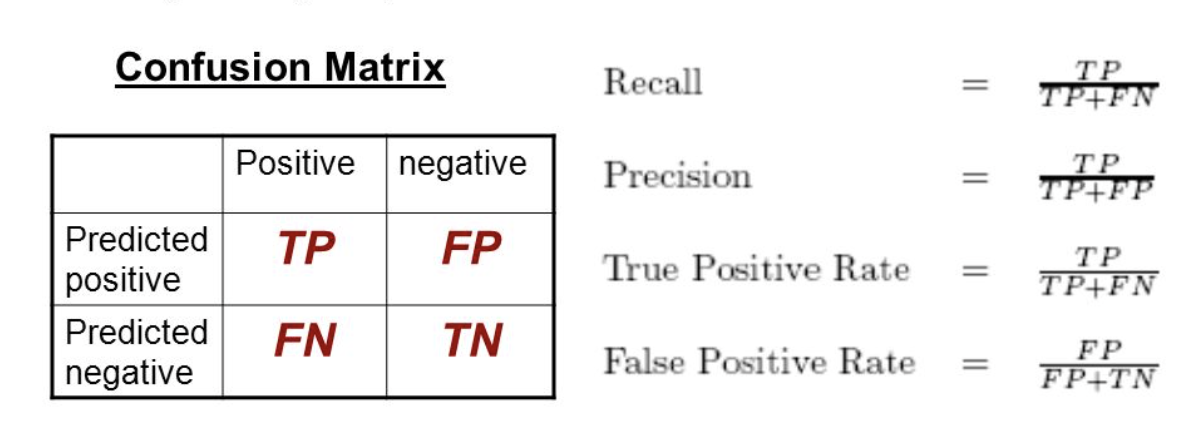

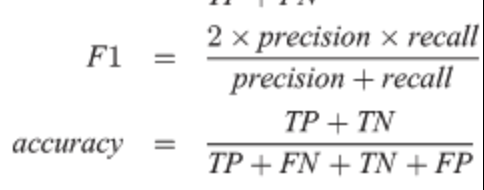

In [ ]:
accuracy_logit = metrics.accuracy_score(y_test, y_pred)
accuracy_logit

0.7792207792207793

In [ ]:
precision_logit = metrics.precision_score(y_test, y_pred)
precision_logit

0.7560975609756098

In [ ]:
recall_logit = metrics.recall_score(y_test, y_pred)
recall_logit

0.5636363636363636

In [ ]:
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.78761   0.89899   0.83962        99
           1    0.75610   0.56364   0.64583        55

    accuracy                        0.77922       154
   macro avg    0.77185   0.73131   0.74273       154
weighted avg    0.77636   0.77922   0.77041       154



## Дополнительные задания

#### Используйте метод опорных векторов для построения альтернативной модели предсказания диабета.

In [ ]:
clf_svm = SVC()
clf_svm.fit(x_train, y_train)

SVC()

#### Сравните метрики эффективности и сделайте вывод о том, какая модель лучше предсказывает заболевание.

In [ ]:
y_hat = clf_svm.predict(x_test)

In [ ]:
accuracy_svm = metrics.accuracy_score(y_test, y_hat)
accuracy_svm

0.7857142857142857

In [ ]:
precision_svm = metrics.precision_score(y_test, y_hat)
precision_svm

0.8235294117647058

In [ ]:
recall_svm = metrics.recall_score(y_test, y_hat)
recall_svm

0.509090909090909

In [ ]:
print(classification_report(y_test, y_hat, digits=5))

              precision    recall  f1-score   support

           0    0.77500   0.93939   0.84932        99
           1    0.82353   0.50909   0.62921        55

    accuracy                        0.78571       154
   macro avg    0.79926   0.72424   0.73926       154
weighted avg    0.79233   0.78571   0.77071       154



In [ ]:
[accuracy_svm > accuracy_logit,  # у опорных векторов лучше
 precision_svm > precision_logit,  # у опорных векторов лучше
 recall_svm > recall_logit]  # у опорных векторов хуже

[True, True, False]

In [ ]:
[accuracy_svm - accuracy_logit, 
 precision_svm - precision_logit, 
 recall_svm - recall_logit]

[0.00649350649350644, 0.06743185078909608, -0.054545454545454564]

#### Постройте модели классификации на основе следующих методов:
* логистическая регрессия (LogisticRegression);
* метод опорных векторов с линейным ядром (SVC);
* метод опорных векторов с гауссовым ядром (SVC);
* метод k ближайших соседей (KNeighborsClassifier);
* многослойный перцептрон (MLP);
* другие методы по желанию;


In [ ]:
scoring = {'accuracy' : make_scorer(metrics.accuracy_score), 
           'precision' : make_scorer(metrics.precision_score),
           'recall' : make_scorer(metrics.recall_score)}

In [ ]:
models = {'LogisticRegression': LogisticRegression(),  # max_iter=500
          'SVC_lin': SVC(kernel='linear'),
          'SVC_g': SVC(kernel='rbf'),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'MLP': MLPClassifier(),
          'DecisionTreeClassifier': DecisionTreeClassifier()}

In [ ]:
res_metrics = dict()
cv = ShuffleSplit(n_splits=5, test_size=0.15, random_state=42)
for i in range(len(models)):
    name_model = list(models.keys())[i]
    model = models[name_model]
    res_metrics[name_model] = cross_validate(model, X, Y, cv=cv,
                                              scoring=scoring)

In [ ]:
# res_metrics

#### Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;


In [ ]:
analysis = []
for clf, met in res_metrics.items():
    analysis.append([])
    analysis[-1].append(clf)
    analysis[-1].extend([np.mean(met['test_accuracy']),
                         np.mean(met['test_precision']),
                         np.mean(met['test_recall'])])

In [ ]:
pd.DataFrame(analysis, columns=['model', 'accuracy', 'precision', 'recall'])

,model,accuracy,precision,recall
0,LogisticRegression,0.772414,0.698088,0.575784
1,SVC_lin,0.763793,0.686606,0.567828
2,SVC_g,0.767241,0.743819,0.478486
3,KNeighborsClassifier,0.725862,0.607905,0.545578
4,MLP,0.725862,0.620140,0.452885
5,DecisionTreeClassifier,0.715517,0.577932,0.550426


#### Для каждой модели из п.3 постройте кривые обучения и диагностируйте недо-/переобучение модели. Попробуйте изменить параметр регуляризации для улучшения результатов модели.

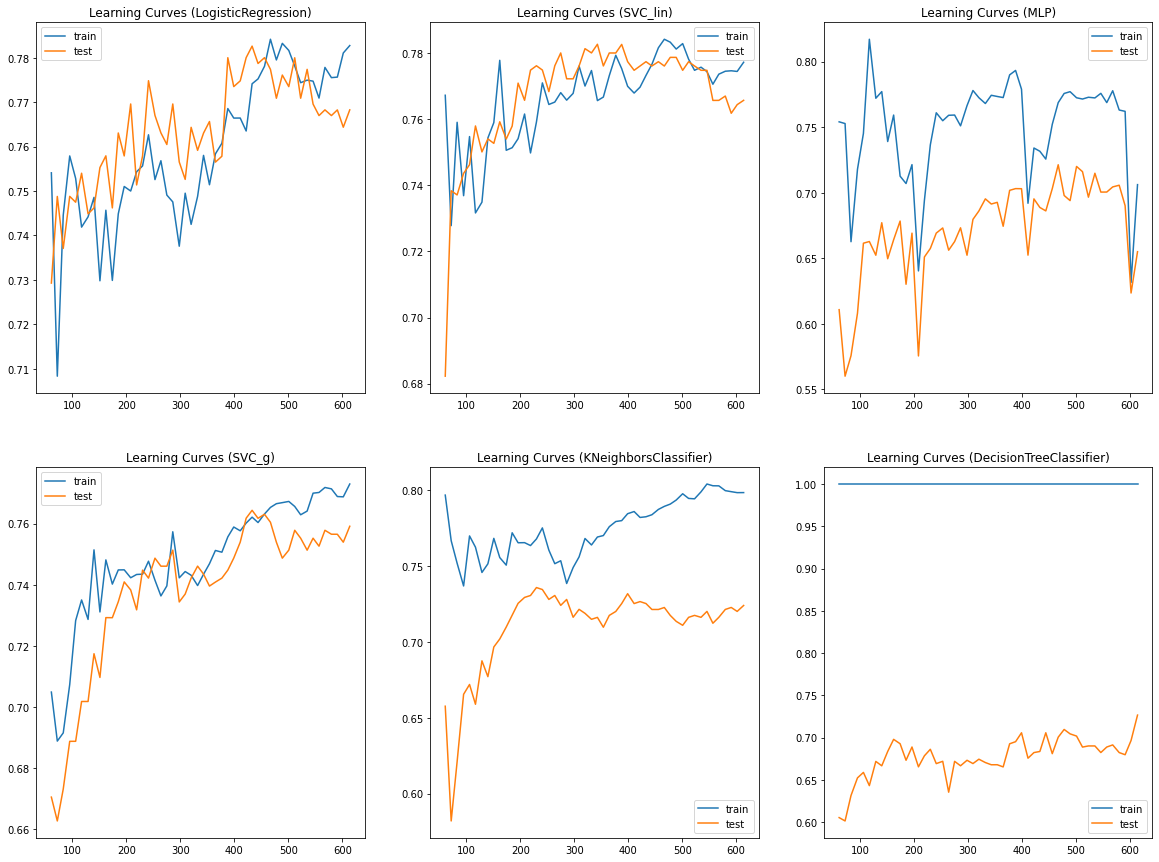

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
ind_sub = [[0, 0], [0, 1], [1, 0], [1, 1], [0, 2], [1, 2]]
ts = np.linspace(0.1, 1, 50)
for i in range(len(models)):
    name_model = list(models.keys())[i]
    title = f'Learning Curves ({name_model})'
    model = models[name_model]
    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=5, 
                                                            random_state=42,
                                                            scoring='accuracy',
                                                            train_sizes=ts,
                                                            n_jobs=2)
    x, y = train_sizes, np.mean(train_scores, axis=1)
    axes[ind_sub[i][0], ind_sub[i][1]].plot(x, y, label='train')
    x, y = train_sizes, np.mean(test_scores, axis=1)
    axes[ind_sub[i][0], ind_sub[i][1]].plot(x, y, label='test')
    axes[ind_sub[i][0], ind_sub[i][1]].legend()
    axes[ind_sub[i][0], ind_sub[i][1]].set_title(title)

По графикам видно:
* LogisticRegression – возможно, переобучена, можно попробовать регуляризовать.

* SVC_lin – хороший результат, возможно, переобучена, так как на последних итерациях качество на тесте упало, хотя на трейне продолжало расти.

* MLP – довольно большая разница accuracy на трейне и тесте, есть скачки. Нужно добавлять регуляризацию. 

* SVC_g – хороший результат, модель нельзя назвать переобученной. Даже можно попробовать еще дообучать.

* KNeighborsClassifier – на нескольких последних шагах качество модели менялось несильно. Однако можно попробовать подобрать параметры, чтобы на тесте качество было повыше. При размере обучающей выборки примерно 250 была максимальная точность на тесте, затем продолжила расти на трейне и немного падать на тесте. 

* DecisionTreeClassifier – сильно подстроился под данные, явное переобучение. accuracy на обучении 1, на тесте хуже. Нужно добавлять регуляризацию.

In [ ]:
parameters = [{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
               'C': [0.001, 0.01, 1, 10, 100, 1000],
               'max_iter': np.arange(100, 501, 100)},                           #  LogisticRegression
              
              {'C': [0.001, 0.01, 1, 10, 100, 1000],
               'max_iter': np.arange(-1, 505, 101)},                           #  SVC_lin 
              
              {'C': [0.001, 0.01, 1, 10, 100, 1000],
               'max_iter': np.arange(-1, 505, 101)},                           #  SVC_g 
              
              {'n_neighbors' : np.arange(3, 10, 2),
               'weights': ['uniform', 'distance'],
               'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},                           #  KNeighborsClassifier 
              
              {'activation': ['identity', 'logistic', 'tanh', 'relu'],
               'alpha': [0.001, 0.01, 1, 10, 100, 1000],
               'learning_rate': ['constant', 'invscaling', 'adaptive'],
               'max_iter': np.arange(-1, 505, 101)},                           #  MLP 
              
              {'criterion': ['gini', 'entropy'],
               'max_depth': list(np.arange(3, 10, 2)) + [None],
               'min_samples_split' : np.arange(2, 11, 2)}]                           #  DecisionTreeClassifier

In [ ]:
# ОСТОРОЖНО 
# РАБОТАЕТ ОЧЕНЬ ДОЛГО


# res_grid = dict()
# for i in range(len(models)):
#     name_model = list(models.keys())[i]
#     model = models[name_model]
#     gscv = GridSearchCV(model, parameters[i], scoring='accuracy', cv=5).fit(X, Y)
#     res_grid[name_model] = {'best_estimator': gscv.best_estimator_,
#                             'best_score': gscv.best_score_,
#                             'best_params': gscv.best_params_,
#                             'cv_results': gscv.cv_results_}

In [ ]:
res_grid.keys()

dict_keys(['LogisticRegression', 'SVC_lin', 'SVC_g', 'KNeighborsClassifier', 'MLP', 'DecisionTreeClassifier'])

In [ ]:
res_grid['LogisticRegression']['best_params']

{'C': 10, 'max_iter': 100, 'penalty': 'l2'}

In [ ]:
res_grid['SVC_lin']['best_params']

{'C': 100, 'max_iter': -1}

In [ ]:
res_grid['SVC_g']['best_params']

{'C': 10, 'max_iter': 302}

In [ ]:
res_grid['KNeighborsClassifier']['best_params']

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}

In [ ]:
res_grid['MLP']['best_params']

{'activation': 'logistic',
 'alpha': 0.01,
 'learning_rate': 'invscaling',
 'max_iter': 403}

In [ ]:
res_grid['DecisionTreeClassifier']['best_params']

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}

In [ ]:
model_search = {'LogisticRegression': LogisticRegression(C=10, max_iter=100, 
                                                         penalty='l2'),
                
                'SVC_lin': SVC(kernel='linear'),

                'SVC_g': SVC(kernel='rbf', C=10, max_iter=302),

                'KNeighborsClassifier': KNeighborsClassifier(algorithm='auto', 
                                                             n_neighbors=9, 
                                                             weights='uniform'),
                
                'MLP': MLPClassifier(activation='logistic', alpha=0.01,
                                    learning_rate='invscaling', max_iter=403),
                
                'DecisionTreeClassifier': DecisionTreeClassifier(criterion='gini', 
                                                                 max_depth=5,
                                                                 min_samples_split=2)}

Learning Curves (LogisticRegression)
Learning Curves (SVC_lin)
Learning Curves (SVC_g)
Learning Curves (KNeighborsClassifier)
Learning Curves (MLP)
Learning Curves (DecisionTreeClassifier)


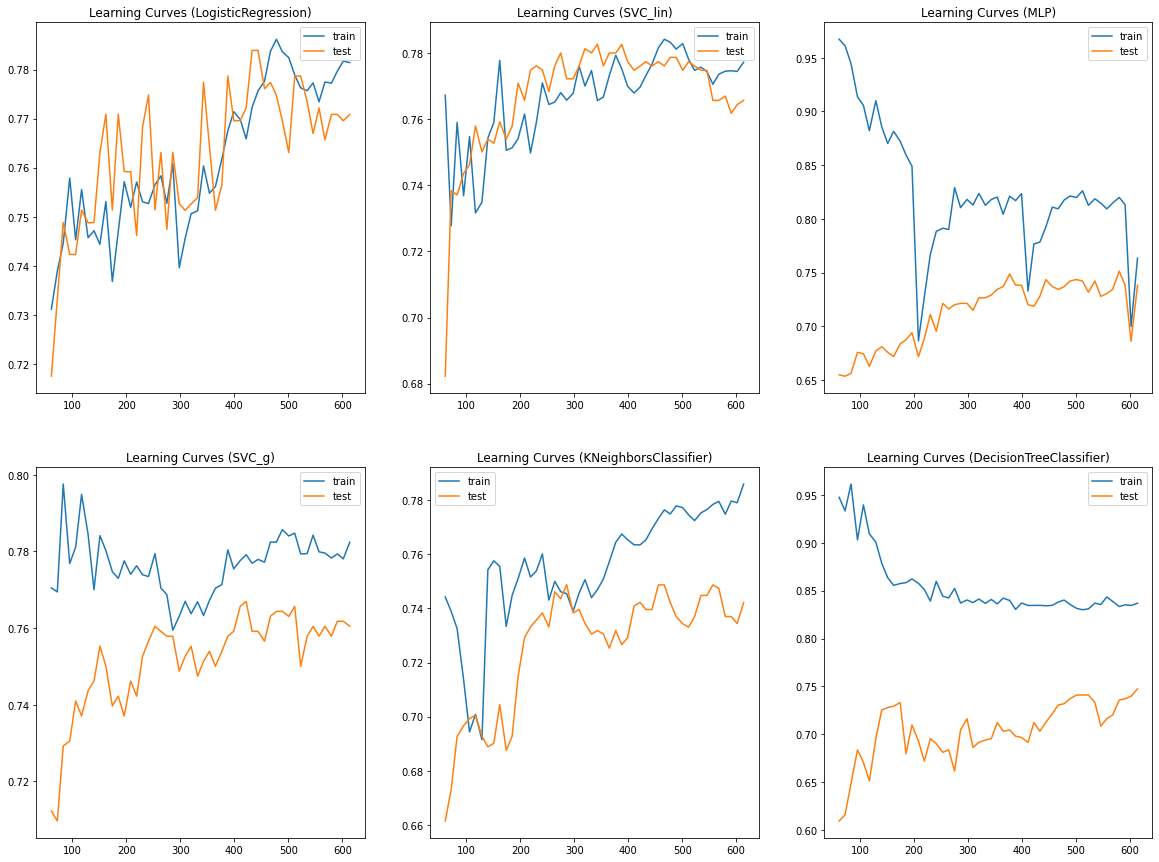

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
ind_sub = [[0, 0], [0, 1], [1, 0], [1, 1], [0, 2], [1, 2]]
ts = np.linspace(0.1, 1, 50)
for i in range(len(model_search)):
    name_model = list(model_search.keys())[i]
    title = f'Learning Curves ({name_model})'
    print(title)
    model = model_search[name_model]
    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=5, 
                                                            random_state=42,
                                                            scoring='accuracy',
                                                            train_sizes=ts,
                                                            n_jobs=2)
    x, y = train_sizes, np.mean(train_scores, axis=1)
    axes[ind_sub[i][0], ind_sub[i][1]].plot(x, y, label='train')
    x, y = train_sizes, np.mean(test_scores, axis=1)
    axes[ind_sub[i][0], ind_sub[i][1]].plot(x, y, label='test')
    axes[ind_sub[i][0], ind_sub[i][1]].legend()
    axes[ind_sub[i][0], ind_sub[i][1]].set_title(title)

![](https://drive.google.com/uc?export=view&id=1b3nr_krD3ZnlYg1LloZ_QT1NPgQEKM47)

#### Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).

In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [ ]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=True)

In [ ]:
cls_ligit = LogisticRegression(max_iter=1000)

In [ ]:
cls_ligit.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = cls_ligit.predict(x_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [ ]:
metrics.confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [ ]:
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        11
           1    1.00000   0.92308   0.96000        13
           2    0.85714   1.00000   0.92308         6

    accuracy                        0.96667        30
   macro avg    0.95238   0.97436   0.96103        30
weighted avg    0.97143   0.96667   0.96728        30



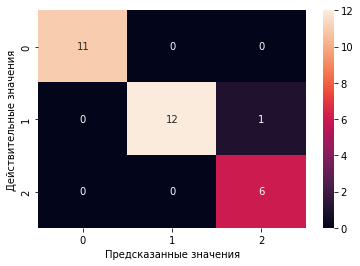

In [ ]:
class_names = [0, 1, 2]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
 
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения');

In [ ]:
scoring = {'accuracy' : make_scorer(metrics.accuracy_score), 
           'precision' : make_scorer(metrics.precision_score, average='weighted'),
           'recall' : make_scorer(metrics.recall_score, average='weighted')}

In [ ]:
models = {'LogisticRegression': LogisticRegression(max_iter=1000),
          'SVC_lin': SVC(kernel='linear'),
          'SVC_g': SVC(kernel='rbf'),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'MLP': MLPClassifier(),
          'DecisionTreeClassifier': DecisionTreeClassifier()}

In [ ]:
res_metrics = dict()
cv = ShuffleSplit(n_splits=5, test_size=0.15, random_state=42)
for i in range(len(models)):
    name_model = list(models.keys())[i]
    model = models[name_model]
    res_metrics[name_model] = cross_validate(model, X, Y, cv=cv,
                                              scoring=scoring)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

In [ ]:
# res_metrics

In [ ]:
analysis = []
for clf, met in res_metrics.items():
    analysis.append([])
    analysis[-1].append(clf)
    analysis[-1].extend([np.mean(met['test_accuracy']),
                         np.mean(met['test_precision']),
                         np.mean(met['test_recall'])])

In [ ]:
pd.DataFrame(analysis, columns=['model', 'accuracy', 'precision', 'recall'])

,model,accuracy,precision,recall
0,LogisticRegression,0.956522,0.959817,0.956522
1,SVC_lin,0.973913,0.975000,0.973913
2,SVC_g,0.956522,0.959817,0.956522
3,KNeighborsClassifier,0.973913,0.977208,0.973913
4,MLP,0.991304,0.992391,0.991304
5,DecisionTreeClassifier,0.939130,0.946673,0.939130


Видим, что все модели дали +- похожий результат – везде accuracy более 90%. precision и recall тоже отличные. Проверялось с помощью кросс-валидации на валидационной выборке. 

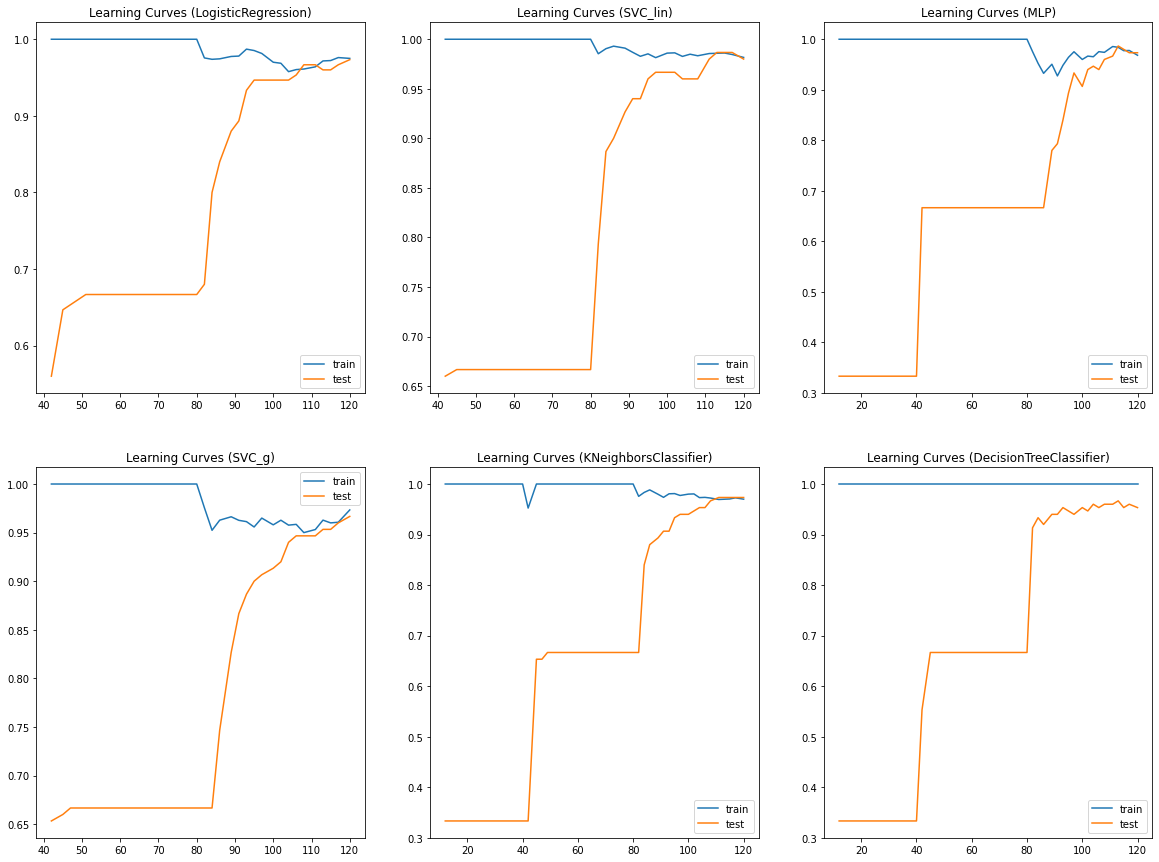

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
ind_sub = [[0, 0], [0, 1], [1, 0], [1, 1], [0, 2], [1, 2]]
ts = np.linspace(0.1, 1, 50)
for i in range(len(models)):
    name_model = list(models.keys())[i]
    title = f'Learning Curves ({name_model})'
    model = models[name_model]
    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=5, 
                                                            random_state=42,
                                                            scoring='accuracy',
                                                            train_sizes=ts,
                                                            n_jobs=2)
    x, y = train_sizes, np.mean(train_scores, axis=1)
    axes[ind_sub[i][0], ind_sub[i][1]].plot(x, y, label='train')
    x, y = train_sizes, np.mean(test_scores, axis=1)
    axes[ind_sub[i][0], ind_sub[i][1]].plot(x, y, label='test')
    axes[ind_sub[i][0], ind_sub[i][1]].legend()
    axes[ind_sub[i][0], ind_sub[i][1]].set_title(title)

Модели нельзя назвать переобученными и недообученные (если только MLP, так как было предупреждение об остановке из-за максимума итераций. Но он все же на тесте дает довольно хорошие результаты). Кривые обучения показывают, что модели должны довольно хорошо предсказывать класс. 